# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.295  1  0.628 0.429 0.003   
                             age        0.124  1  0.263 0.609 0.001   
                             Kiel       1.819  1  3.867 0.051 0.020   
                             Magdeburg  4.127  1  8.776 0.003 0.044   
                             Sweden     7.277  1 15.474 0.000 0.075   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.004  1  0.005 0.947 0.000   
                             age        1.554  1  1.834 0.177 0.010   
                             Kiel       0.016  1  0.019 0.892 0.000   
                             Magdeburg  1.912  1  2.256 0.135 0.012   
                             Sweden    18.440  1 21.758 0.000 0.102   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.367  0.586    False  
                             age               0.215  0.740    False  
                             Kiel              1.295  0.124    False  
                             Magdeburg         2.463  0.014     True  
                             Sweden            3.932  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.024  0.970    False  
                             age               0.751  0.319    False  
                             Kiel              0.050  0.937    False  
                             Magdeburg         0.871  0.262    False  
                             Sweden            5.236  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.830  1  5.193 0.024 0.026   
                             age        0.017  1  0.104 0.747 0.001   
                             Kiel       0.448  1  2.801 0.096 0.014   
                             Magdeburg  0.884  1  5.528 0.020 0.028   
                             Sweden     2.316  1 14.483 0.000 0.070   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.325  1  0.698 0.404 0.004   
                             age        1.599  1  0.842 0.360 0.004   
                             Kiel       5.528  1  2.913 0.089 0.015   
                             Magdeburg 14.345  1  7.560 0.007 0.038   
                             Sweden     0.002  1  0.001 0.974 0.000   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.624  0.063    False  
                             age               0.127  0.833    False  
                             Kiel              1.018  0.190    False  
                             Magdeburg         1.705  0.054    False  
                             Sweden            3.720  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.393  0.554    False  
                             age               0.444  0.512    False  
                             Kiel              1.048  0.181    False  
                             Magdeburg         2.184  0.022     True  
                             Sweden            0.011  0.985    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.429         0.367  0.586    False   
                             Kiel      0.051         1.295  0.124    False   
                             Magdeburg 0.003         2.463  0.014     True   
                             Sweden    0.000         3.932  0.001     True   
                             age       0.609         0.215  0.740    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.947         0.024  0.970    False   
                             Kiel      0.892         0.050  0.937    False   
                             Magdeburg 0.135         0.871  0.262    False   
                             Sweden    0.000         5.236  0.000     True   
                             age       0.177         0.751  0.319    False   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.024         1.624  0.063    False  
                             Kiel      0.096         1.018  0.190    False  
                             Magdeburg 0.020         1.705  0.054    False  
                             Sweden    0.000         3.720  0.001     True  
                             age       0.747         0.127  0.833    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.404         0.393  0.554    False  
                             Kiel      0.089         1.048  0.181    False  
                             Magdeburg 0.007         2.184  0.022     True  
                             Sweden    0.974         0.011  0.985    False  
                             age       0.360         0.444  0.512    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.261         2.482     0.338     0.246         2.744     0.312
std       0.304         5.335     0.331     0.298         5.159     0.326
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.336     0.015     0.002         0.359     0.008
50%       0.122         0.914     0.244     0.093         1.033     0.185
75%       0.462         2.415     0.616     0.438         2.719     0.584
max       1.000       149.377     1.000     1.000        84.135     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_34408/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.429         0.367   
A0A024R0T9;K7ER74;P02655                           AD     0.055         1.257   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.203         0.693   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.558         0.253   
A0A075B6H7                                         AD     0.231         0.637   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.067         1.174   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.826         0.083   
S4R3U6                                             AD     0.947         0.024   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.586    False   
A0A024R0T9;K7ER74;P02655                           AD      0.132    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.351    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.697    False   
A0A075B6H7                                         AD      0.384    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.154    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.183    False   
Q9Y6Y9                                             AD      0.900    False   
S4R3U6                                             AD      0.970    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.024         1.624   
A0A024R0T9;K7ER74;P02655                           AD     0.034         1.469   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.338         0.471   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.310         0.508   
A0A075B6H7                                         AD     0.119         0.923   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.082         1.087   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.388         0.411   
S4R3U6                                             AD     0.404         0.393   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.063    False  
A0A024R0T9;K7ER74;P02655                           AD      0.083    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.490    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.461    False  
A0A075B6H7                                         AD      0.226    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.255         1.402     0.337     0.247         1.495     0.320
std       0.294         1.646     0.319     0.289         1.769     0.314
min       0.000         0.000     0.000     0.000         0.001     0.000
25%       0.012         0.364     0.040     0.008         0.360     0.027
50%       0.124         0.906     0.247     0.107         0.971     0.208
75%       0.433         1.911     0.590     0.437         2.071     0.583
max       1.000        23.477     1.000     0.997        23.420     0.998

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1023,994


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.429         0.367  0.586   
A0A024R0T9;K7ER74;P02655                           0.055         1.257  0.132   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.203         0.693  0.351   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.558         0.253  0.697   
A0A075B6H7                                         0.231         0.637  0.384   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.067         1.174  0.154   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.183   
Q9Y6Y9                                             0.826         0.083  0.900   
S4R3U6                                             0.947         0.024  0.970   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.024   
A0A024R0T9;K7ER74;P02655                              False 0.034   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.338   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.310   
A0A075B6H7                                            False 0.119   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.082   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.388   
S4R3U6                                                False 0.404   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.624  0.063   
A0A024R0T9;K7ER74;P02655                                   1.469  0.083   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.471  0.490   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.508  0.461   
A0A075B6H7                                                 0.923  0.226   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.302   
Q9Y6X5                                                     1.087  0.168   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.411  0.539   
S4R3U6                                                     0.393  0.554   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    960
PI (yes) - QRILC (yes)   364
PI (no)  - QRILC (yes)    63
PI (yes) - QRILC (no)     34
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_34408/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                           p-unc -Log10 pvalue qvalue   
protein groups                                                          
A0A075B6I0                                 0.025         1.597  0.072   
A0A087WWT2;Q9NPD7                          0.039         1.409  0.101   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2   0.012         1.907  0.040   
A0A0A0MTH0;Q8N0W4;Q8N0W4-2;Q8NFZ3;Q8NFZ3-2 0.223         0.651  0.375   
A0A0A0MTP9;F8VZI9;Q9BWQ8                   0.022         1.657  0.064   
...                                          ...           ...    ...   
Q9NZ94;Q9NZ94-2;Q9NZ94-3                   0.413         0.384  0.570   
Q9P0K9                                     0.018         1.740  0.054   
Q9UJ14                                     0.036         1.443  0.094   
Q9UNW1                                     0.006         2.240  0.021   
Q9UQ52                                     0.067         1.175  0.154   

                                                    QRILC                \
                                           rejected p-unc -Log10 pvalue   
protein groups                                                            
A0A075B6I0                                    False 0.002         2.722   
A0A087WWT2;Q9NPD7                             False 0.004         2.373   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2       True 0.045         1.347   
A0A0A0MTH0;Q8N0W4;Q8N0W4-2;Q8NFZ3;Q8NFZ3-2    False 0.016         1.805   
A0A0A0MTP9;F8VZI9;Q9BWQ8                      False 0.014         1.861   
...                                             ...   ...           ...   
Q9NZ94;Q9NZ94-2;Q9NZ94-3                      False 0.009         2.041   
Q9P0K9                                        False 0.010         2.003   
Q9UJ14                                        False 0.016         1.799   
Q9UNW1                                         True 0.209         0.680   
Q9UQ52                                        False 0.004         2.392   

                                                                data  
                                           qvalue rejected frequency  
protein groups                                                        
A0A075B6I0                                  0.008     True       194  
A0A087WWT2;Q9NPD7                           0.015     True       193  
A0A087X152;D6RE16;E0CX15;O95185;O95185-2    0.104    False       176  
A0A0A0MTH0;Q8N0W4;Q8N0W4-2;Q8NFZ3;Q8NFZ3-2  0.044     True       189  
A0A0A0MTP9;F8VZI9;Q9BWQ8                    0.040     True       193  
...                                           ...      ...       ...  
Q9NZ94;Q9NZ94-2;Q9NZ94-3                    0.028     True       115  
Q9P0K9                                      0.030     True       192  
Q9UJ14                                      0.045     True       169  
Q9UNW1                                      0.347    False       171  
Q9UQ52                                      0.014     True       188  

[97 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.586,0.063,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.132,0.083,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.351,0.490,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.697,0.461,196,PI (no) - QRILC (no)
A0A075B6H7,0.384,0.226,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.316,0.302,197,PI (no) - QRILC (no)
Q9Y6X5,0.154,0.168,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.183,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.899,0.008,86,PI (no) - QRILC (yes),0.892
P07196,0.041,0.718,77,PI (yes) - QRILC (no),0.678
Q9NS84,0.608,0.018,83,PI (no) - QRILC (yes),0.590
A0A0B4J2C3;P13693;Q5W0H4,0.608,0.037,148,PI (no) - QRILC (yes),0.572
A0A1W2PQ94;B4DS77;B4DS77-2;B4DS77-3,0.579,0.016,69,PI (no) - QRILC (yes),0.563
...,...,...,...,...,...
P07093-2;P07093-3,0.063,0.044,168,PI (no) - QRILC (yes),0.019
O95450;O95450-2,0.047,0.060,170,PI (yes) - QRILC (no),0.013
K7ERI9;P02654,0.042,0.054,196,PI (yes) - QRILC (no),0.012


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


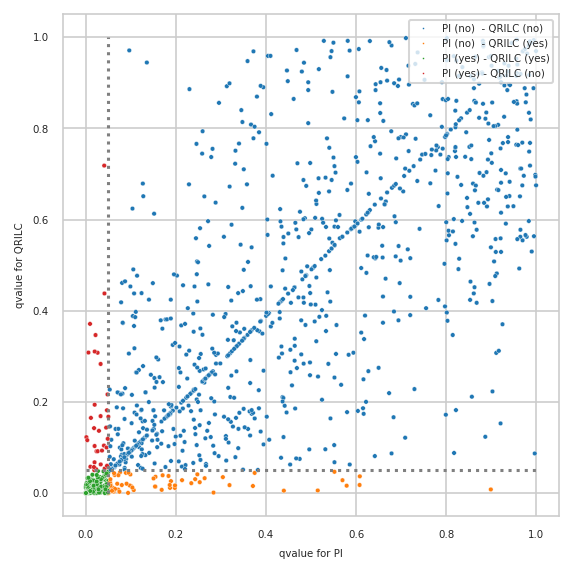

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


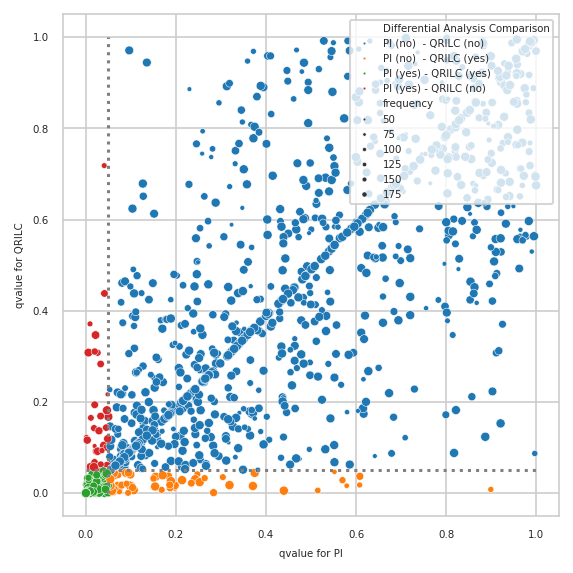

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN1,ENSP00000326366,5.000
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
MAMSTR,ENSP00000324175,0.680
KCNE4,ENSP00000281830,0.680
U7,U7,0.680


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/924ec7e362d761ecf0807b9074d79999_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3587: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out